In [203]:
import math
import numpy as np
import matplotlib.pyplot as plt 

In [204]:
def readTxtFile(inputFile):
    with open(inputFile, "r") as myFile:
        content = myFile.read()
        info = content.split(" ")
        a = int(info[0])
        b = float(info[1])
        c = float(info[2])
        d = int(info[3])
        x0 = int(info[4])
        y0 = int(info[5])
        deltaT = float(info[6])
        T = int(info[7])
        return a, b, c, d, x0, y0, deltaT, T

data = readTxtFile("input.txt")
print(data)



(1, 0.25, 0.1, 1, 50, 1, 0.01, 100)


In [205]:
def FE(a, b, c, d, x0, y0, deltaT):
    nextX = x0 + deltaT*(a*x0 - b*x0*y0)
    nextY = y0 + deltaT*(c*x0*y0 - d*y0)
    return nextX, nextY

In [206]:
# Leap-frog Iterator
def leapFrog(a, b, c, d, x0, y0, deltaT):
    x1, y1 = FE(a, b, c, d, x0, y0, deltaT)
    nextX = x0 + 2*deltaT*(a*x1 - b*x1*y1)
    nextY = y0 + 2*deltaT*(c*x1*y1 - d*y1)
    return nextX, nextY

In [207]:
def function_x(x, y, a, b):
    ans = (a*x)-(b*x*y)
    return ans

def function_y(x, y, c, d):
    ans = (c*x*y)-(d*y)
    return ans

In [208]:
def delx(x_1, y_1, x_0, y_0, deltaT, a, b):
    answer = x_1-x_0-deltaT*(a*x_1-b*x_1*y_1)
    # answer = x_1-x_0-deltaT*function_x(x_1, y_1, a, b)
    return answer

def dely(x_1, y_1, x_0, y_0, deltaT, c, d):
    answer = y_1-y_0-deltaT*(c*x_1*y_1-d*y_1)
    # answer = y_1-y_0-deltaT*function_y(x_1, y_1, c, d)
    return answer

In [209]:
def NR_BE(xO, yO, a, b, c, d, deltaT, T):
    iteratorRange = np.arange(0, T, deltaT)
    x_values = [xO]
    y_values = [yO]
    for i in iteratorRange:
        if i == 0: 
            for y in range(100):
                gradientX = delx(xO, yO, xO, yO, deltaT, a, b)
                gradientY = dely(xO, yO, xO, yO, deltaT, c, d)

                jacobian_matrix = np.array([[1-deltaT*(a-b*yO), deltaT*b*xO], 
                                            [-deltaT*c*yO , 1-deltaT*(c*xO-d)]])

                inverse_jacobian = np.linalg.inv(jacobian_matrix)
                xO = xO - deltaT*(((inverse_jacobian[0, 0]*gradientX) + (inverse_jacobian[0, 1]*gradientY)))
                yO = yO - deltaT*(((inverse_jacobian[1, 0]*gradientX) + (inverse_jacobian[1, 1]*gradientY)))
            x_values.append(xO)
            y_values.append(yO)
        else:
            xNew = x_values[-1]
            xOld = x_values[-2]
            yNew = y_values[-1]
            yOld = y_values[-2]
            for y in range(100):
                gradientX = delx(xNew, yNew, xOld, yOld, deltaT, a, b)
                gradientY = dely(xNew, yNew, xOld, yOld, deltaT, c, d)

                jacobian_matrix = np.array([[1-deltaT*(a-b*yNew), deltaT*b*xNew], 
                                            [-deltaT*c*yNew , 1-deltaT*(c*xNew-d)]])

                inverse_jacobian = np.linalg.inv(jacobian_matrix)
                xOld = xNew
                yOld = yNew
                xNew = xNew - deltaT*(((inverse_jacobian[0, 0]*gradientX) + (inverse_jacobian[0, 1]*gradientY)))
                yNew = yNew - deltaT*(((inverse_jacobian[1, 0]*gradientX) + (inverse_jacobian[1, 1]*gradientY)))
            x_values.append(xNew)
            y_values.append(yNew)

    return x_values,y_values
a, b, c, d, x0, y0, deltaT, T = readTxtFile("input.txt")
BE_X, BE_Y = NR_BE(x0, y0, a, b, c, d, deltaT, T)


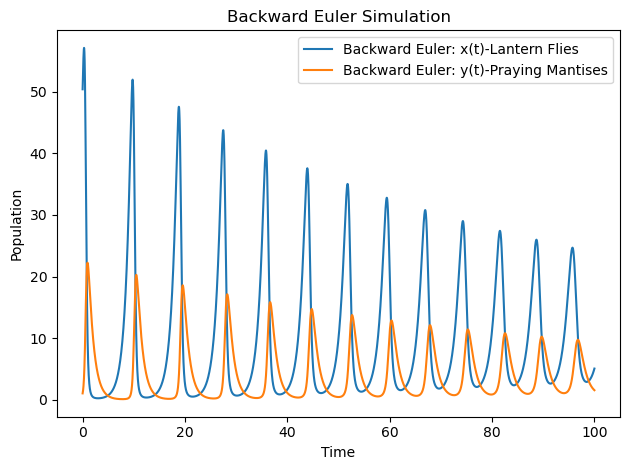

In [214]:
plt.plot(np.arange(0, T, deltaT), BE_X[1:], label='Backward Euler: x(t)-Lantern Flies')
plt.plot(np.arange(0, T, deltaT), BE_Y[1:], label='Backward Euler: y(t)-Praying Mantises')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Backward Euler Simulation')

plt.tight_layout()
plt.show()

In [215]:
def NR_BE(xNew, yNew, xOld, yOld, a, b, c, d, deltaT):
    for i in range(100):
        gradientX = delx(xNew, yNew, xOld, yOld, deltaT, a, b)
        gradientY = dely(xNew, yNew, xOld, yOld, deltaT, c, d)

        jacobian_matrix = np.array([[1-deltaT*(a-b*yNew), deltaT*b*xNew], 
                                    [-deltaT*c*yNew , 1-deltaT*(c*xNew-d)]])

        inverse_jacobian = np.linalg.inv(jacobian_matrix)
        xOld = xNew
        yOld = yNew
        xNew = xNew - deltaT*(((inverse_jacobian[0, 0]*gradientX) + (inverse_jacobian[0, 1]*gradientY)))
        yNew = yNew - deltaT*(((inverse_jacobian[1, 0]*gradientX) + (inverse_jacobian[1, 1]*gradientY)))
    return xNew,yNew

In [216]:
def run_FE_LP_BE(a, b, c, d, x0, y0, deltaT, T ):
    iteratorRange = np.arange(0, T, deltaT)
    FE_x_vals = [x0]
    FE_y_vals = [y0]
    LP_x_Vals = [x0]
    LP_y_vals = [y0]
    BE_x_vals = [x0]
    BE_y_vals = [y0]
    for i in iteratorRange:
        if i == 0:
            x_val, y_val = leapFrog(a, b, c, d, x0, y0, deltaT)
            if x_val < 0 or y_val < 0:
                x_val = 0
                y_val = 0
            LP_x_Vals.append(x_val)
            LP_y_vals.append(y_val)

            # Backward Euler 
            x_next, y_next = NR_BE(x0, y0,x0, y0, a, b, c, d,deltaT)
            BE_x_vals.append(x_next)
            BE_y_vals.append(y_next)
            

        else:
            # Forward Euler
            x_o, y_o = FE(a, b, c, d, FE_x_vals[-1], FE_y_vals[-1], deltaT)
            FE_x_vals.append(x_o)
            FE_y_vals.append(y_o)
            # Leap Frog 
            x_val = LP_x_Vals[-2] + 2*deltaT*(a*LP_x_Vals[-1] - b*LP_x_Vals[-1]*LP_y_vals[-1])
            y_val = LP_y_vals[-2] + 2*deltaT*(c*LP_x_Vals[-1]*LP_y_vals[-1] - d*LP_y_vals[-1])
            if x_val < 0 or y_val < 0:
                x_val = 0
                y_val = 0
            LP_x_Vals.append(x_val)
            LP_y_vals.append(y_val)
            # Backward Euler 
            x_next, y_next = NR_BE(BE_x_vals[-1], BE_y_vals[-1],BE_x_vals[-2],BE_y_vals[-2], a, b, c, d,deltaT)
            BE_x_vals.append(x_next)
            BE_y_vals.append(y_next)
    return FE_x_vals, FE_y_vals, LP_x_Vals[1:], LP_y_vals[1:], BE_x_vals[1:], BE_y_vals[1:]
  

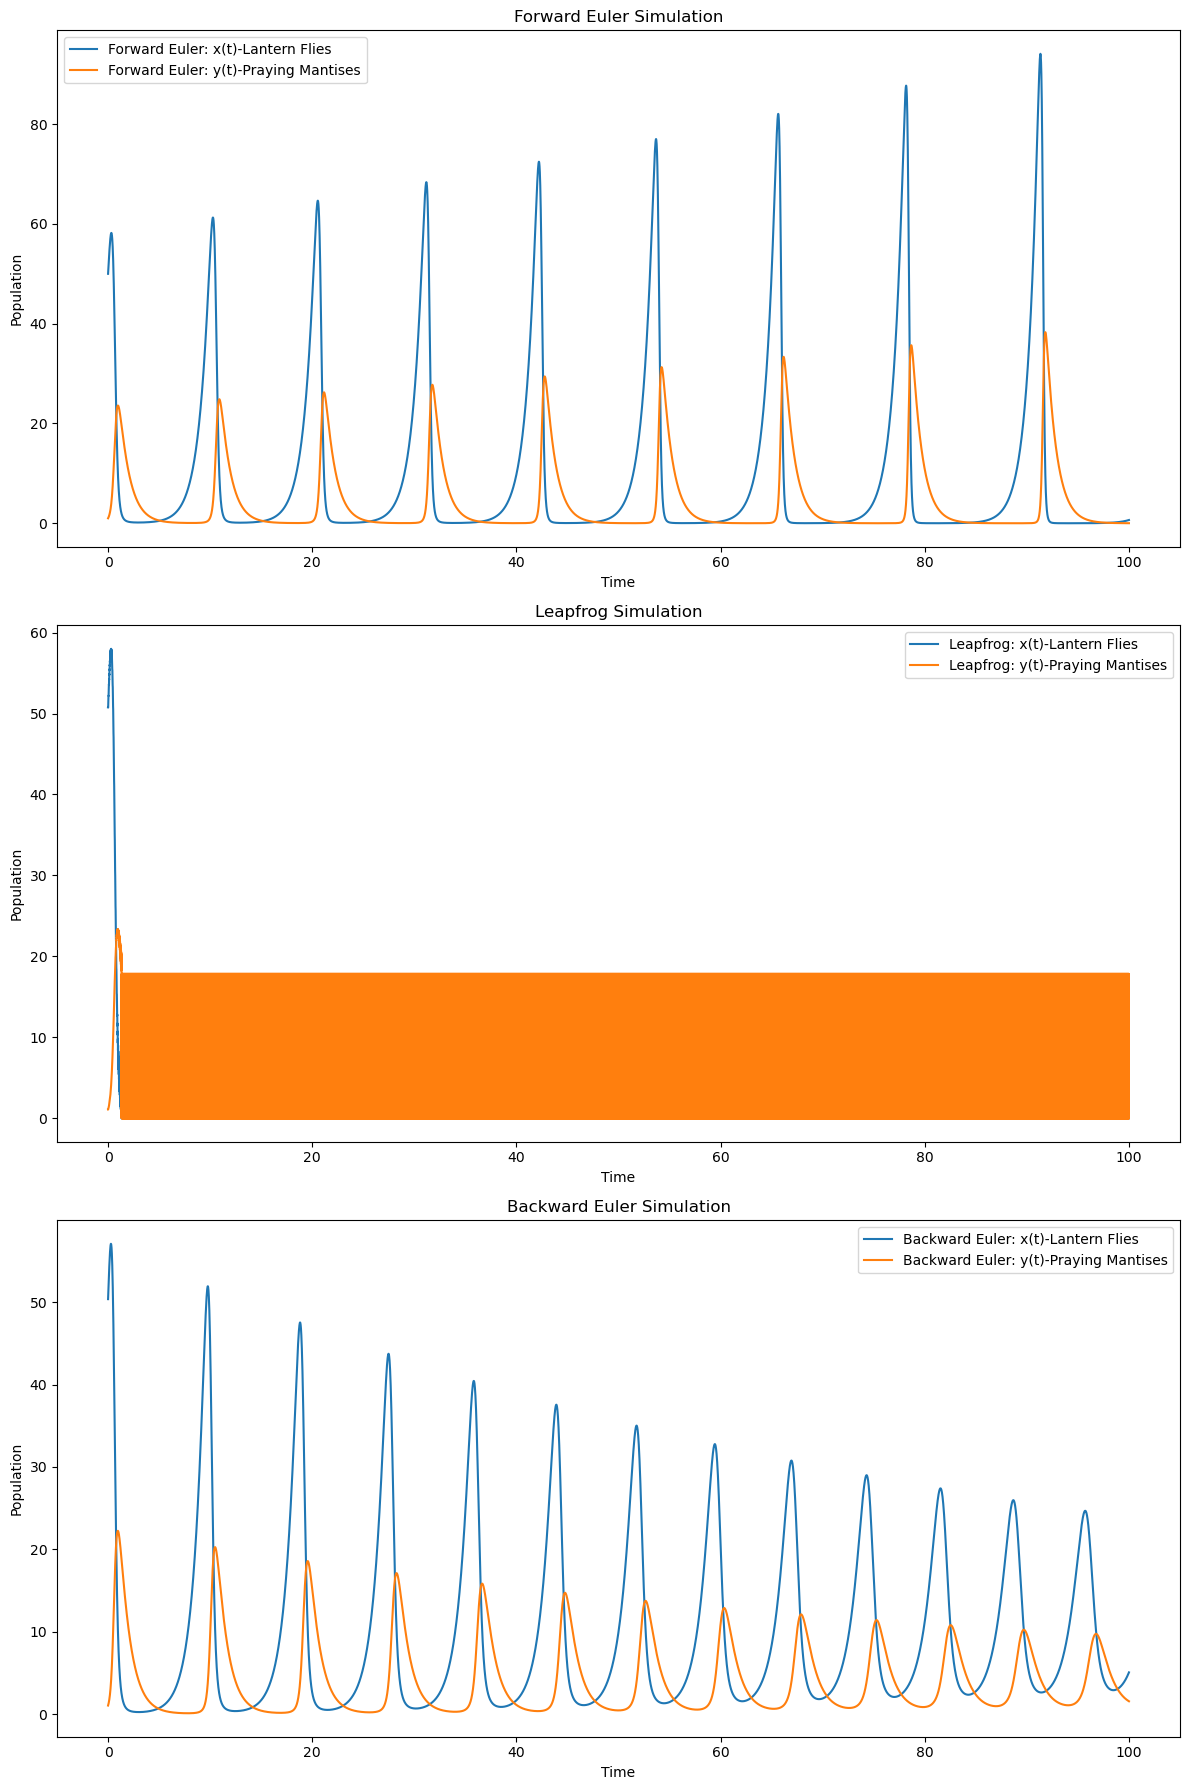

In [217]:
def main():
    a, b, c, d, x0, y0, deltaT, T = readTxtFile("input.txt")
    FE_x_vals, FE_y_vals, LP_x_Vals, LP_y_vals, BE_x_vals, BE_y_vals= run_FE_LP_BE(a, b, c, d, x0, y0, deltaT, T)
    # FE_x_vals, FE_y_vals, LP_x_Vals, LP_y_vals = run_FE_LP_BE(a, b, c, d, x0, y0, deltaT, T)

    import matplotlib.pyplot as plt 
    time = np.arange(0, T, deltaT)
    
    plt.figure(figsize=(12, 18)) 
   
    plt.subplot(311)
    plt.plot(time, FE_x_vals, label='Forward Euler: x(t)-Lantern Flies')
    plt.plot(time, FE_y_vals, label='Forward Euler: y(t)-Praying Mantises')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Forward Euler Simulation')

    plt.subplot(312)
    plt.plot(time, LP_x_Vals, label='Leapfrog: x(t)-Lantern Flies')
    plt.plot(time, LP_y_vals, label='Leapfrog: y(t)-Praying Mantises')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Leapfrog Simulation')

    
    plt.subplot(313)
    plt.plot(time, BE_x_vals, label='Backward Euler: x(t)-Lantern Flies')
    plt.plot(time, BE_y_vals, label='Backward Euler: y(t)-Praying Mantises')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Backward Euler Simulation')

    plt.tight_layout()
    plt.show()

    

if __name__ == "__main__":
    main()